In [1]:
import pandas as pd

In [2]:
!wget  -O 'credit_scoring.csv' -q 'https://www.dropbox.com/scl/fi/5v1ora94vmn46i961ujha/credit_scoring.csv?rlkey=y34fmgqme1e73ca0qbvjpgh9x&dl=0'

Признаки клиентов банка:

- client_id - ID клиента (неотрицательное целое число)
- Age - возраст (вещественный)
- Income - месячный доход (вещественный)
- BalanceToCreditLimit - отношение баланса на кредитной карте к лимту по кредиту (вещественный)
- DIR - Debt-to-income Ratio (вещественный)
- NumLoans - число заемов и кредитных линий
- NumRealEstateLoans - число ипотек и заемов, связанных с недвижимостью (натуральное число)
- NumDependents - число членов семьи, которых содержит клиент, исключая самого клиента (натуральное число)
- Num30-59Delinquencies - число просрочек выплат по кредиту от 30 до 59 дней (натуральное число)
- Num60-89Delinquencies - число просрочек выплат по кредиту от 60 до 89 дней (натуральное число)
- Delinquent90 - Таргет, были ли просрочки выплат по кредиту более 90 дней (бинарный)


In [473]:
df = pd.read_csv("credit_scoring.csv")
df

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
0,0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028,0
1,1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679,0
2,2,2206.731199,55.5,21,1,NaN,1,0,NaN,0.348227,0
3,3,886.132793,55.3,3,0,0.0,0,0,NaN,0.971930,0
4,4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350,0
...,...,...,...,...,...,...,...,...,...,...,...
74995,74995,0.169463,67.6,5,1,0.0,0,0,20129.654428,0.074689,0
74996,74996,2085.662215,43.2,1,1,0.0,0,0,NaN,1.005390,0
74997,74997,0.118935,23.0,4,0,0.0,2,0,2019.117329,0.384511,0
74998,74998,0.203414,46.3,14,2,0.0,0,0,16823.909642,0.524093,0


## Предобработка данных (Заполнение NaN значений для Income, Numdependents)

In [474]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [475]:
df_notnan = df.dropna(axis = 0, how = 'any')
df_notnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60153 entries, 0 to 74999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              60153 non-null  int64  
 1   DIR                    60153 non-null  float64
 2   Age                    60153 non-null  float64
 3   NumLoans               60153 non-null  int64  
 4   NumRealEstateLoans     60153 non-null  int64  
 5   NumDependents          60153 non-null  float64
 6   Num30-59Delinquencies  60153 non-null  int64  
 7   Num60-89Delinquencies  60153 non-null  int64  
 8   Income                 60153 non-null  float64
 9   BalanceToCreditLimit   60153 non-null  float64
 10  Delinquent90           60153 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 5.5 MB


In [476]:
df_notnan.describe()

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
count,60153.000000,60153.000000,60153.000000,60153.000000,60153.000000,60153.000000,60153.000000,60153.000000,6.015300e+04,60153.000000,60153.000000
mean,37490.244177,26.693891,51.584283,8.763270,1.054561,0.847888,0.378003,0.183948,6.740059e+03,6.282711,0.069589
std,21641.535309,423.095777,14.513069,5.185874,1.147032,1.139625,3.432337,3.378364,1.422875e+04,288.723622,0.254456
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,18830.000000,0.144545,41.000000,5.000000,0.000000,0.000000,0.000000,0.000000,3.421354e+03,0.034881,0.000000
50%,37442.000000,0.297580,51.100000,8.000000,1.000000,0.000000,0.000000,0.000000,5.424552e+03,0.176725,0.000000
75%,56218.000000,0.482846,62.000000,11.000000,2.000000,2.000000,0.000000,0.000000,8.291518e+03,0.581910,0.000000
max,74999.000000,61376.131241,103.800000,56.000000,32.000000,20.000000,98.000000,98.000000,1.805573e+06,50873.874533,1.000000


In [477]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(df_notnan.drop('Income', axis = 1), df_notnan['Income'], test_size = 0.2, random_state = 17)

In [478]:
# Нормализация
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

In [479]:
# Инициализация модели
model_linear = LinearRegression()
# Обучение
model_linear.fit(X_train_reg_scaled, y_train_reg)

LinearRegression()

In [480]:
# набор данных с неопределенным Income
missing_values = df[df['Income'].isna()]
missing_values

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
2,2,2206.731199,55.5,21,1,NaN,1,0,NaN,0.348227,0
3,3,886.132793,55.3,3,0,0.0,0,0,NaN,0.971930,0
10,10,2251.011841,42.3,10,2,1.0,0,0,NaN,0.428382,0
18,18,742.195439,47.3,6,1,2.0,0,0,NaN,0.000000,0
19,19,302.372758,77.3,7,0,0.0,0,0,NaN,0.038134,0
...,...,...,...,...,...,...,...,...,...,...,...
74966,74966,2232.205826,55.1,8,1,0.0,0,0,NaN,0.064019,0
74984,74984,2114.249033,52.5,7,1,0.0,0,0,NaN,0.009885,0
74985,74985,1763.109974,65.3,14,2,0.0,0,0,NaN,0.267677,0
74990,74990,50.461751,23.1,1,0,0.0,0,0,NaN,0.367853,0


In [481]:
# Запонлим средними значениями пропуски в NumDependents
missing_values['NumDependents'] = missing_values['NumDependents'].fillna(missing_values['NumDependents'].mean())

<ipython-input-481-adb0cb248d2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values['NumDependents'] = missing_values['NumDependents'].fillna(missing_values['NumDependents'].mean())


In [482]:
# Предсказание для NaN
missing_values['Income'] = model_linear.predict(missing_values.drop('Income', axis = 'columns'))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-482-276655b81ae5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values['Income'] = model_linear.predict(missing_values.drop('Income', axis = 'columns'))


In [483]:
missing_values

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
2,2,2206.731199,55.5,21,1,0.328358,1,0,-9.169004e+05,0.348227,0
3,3,886.132793,55.3,3,0,0.000000,0,0,-3.503575e+05,0.971930,0
10,10,2251.011841,42.3,10,2,1.000000,0,0,-9.458144e+05,0.428382,0
18,18,742.195439,47.3,6,1,2.000000,0,0,-2.859457e+05,0.000000,0
19,19,302.372758,77.3,7,0,0.000000,0,0,-8.073371e+04,0.038134,0
...,...,...,...,...,...,...,...,...,...,...,...
74966,74966,2232.205826,55.1,8,1,0.000000,0,0,5.022064e+06,0.064019,0
74984,74984,2114.249033,52.5,7,1,0.000000,0,0,5.073203e+06,0.009885,0
74985,74985,1763.109974,65.3,14,2,0.000000,0,0,5.238401e+06,0.267677,0
74990,74990,50.461751,23.1,1,0,0.000000,0,0,5.956179e+06,0.367853,0


Поскольку получились отрицательные значения, применим регуляризацию, чтобы уменьшить чувствительность к выбросам

In [484]:
# импорт модели регрессии с l2 регуляризацией.
from sklearn.linear_model import Ridge

In [485]:
ridge_model = Ridge()
ridge_model.fit(X_train_reg_scaled, y_train_reg)

Ridge()

In [486]:
missing_values['Income'] = ridge_model.predict(missing_values.drop('Income', axis = 'columns'))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
<ipython-input-486-1155cbb09e72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values['Income'] = ridge_model.predict(missing_values.drop('Income', axis = 'columns'))


In [487]:
missing_values

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
2,2,2206.731199,55.5,21,1,0.328358,1,0,-9.168796e+05,0.348227,0
3,3,886.132793,55.3,3,0,0.000000,0,0,-3.503496e+05,0.971930,0
10,10,2251.011841,42.3,10,2,1.000000,0,0,-9.457933e+05,0.428382,0
18,18,742.195439,47.3,6,1,2.000000,0,0,-2.859391e+05,0.000000,0
19,19,302.372758,77.3,7,0,0.000000,0,0,-8.073171e+04,0.038134,0
...,...,...,...,...,...,...,...,...,...,...,...
74966,74966,2232.205826,55.1,8,1,0.000000,0,0,5.021956e+06,0.064019,0
74984,74984,2114.249033,52.5,7,1,0.000000,0,0,5.073093e+06,0.009885,0
74985,74985,1763.109974,65.3,14,2,0.000000,0,0,5.238288e+06,0.267677,0
74990,74990,50.461751,23.1,1,0,0.000000,0,0,5.956050e+06,0.367853,0


Регуляризация не помогла избавиться от отрицательных значений, применим метод np.clip()

In [488]:
predictions = model_linear.predict(missing_values.drop('Income', axis = 'columns'))
predictions = np.clip(predictions, a_min=df_notnan['Income'].mean(), a_max=None)
missing_values['Income'] = predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-488-93cfcbdb99d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values['Income'] = predictions


In [489]:
missing_values

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
2,2,2206.731199,55.5,21,1,0.328358,1,0,6.740059e+03,0.348227,0
3,3,886.132793,55.3,3,0,0.000000,0,0,6.740059e+03,0.971930,0
10,10,2251.011841,42.3,10,2,1.000000,0,0,6.740059e+03,0.428382,0
18,18,742.195439,47.3,6,1,2.000000,0,0,6.740059e+03,0.000000,0
19,19,302.372758,77.3,7,0,0.000000,0,0,6.740059e+03,0.038134,0
...,...,...,...,...,...,...,...,...,...,...,...
74966,74966,2232.205826,55.1,8,1,0.000000,0,0,5.022064e+06,0.064019,0
74984,74984,2114.249033,52.5,7,1,0.000000,0,0,5.073203e+06,0.009885,0
74985,74985,1763.109974,65.3,14,2,0.000000,0,0,5.238401e+06,0.267677,0
74990,74990,50.461751,23.1,1,0,0.000000,0,0,5.956179e+06,0.367853,0


In [490]:
df_notnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60153 entries, 0 to 74999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              60153 non-null  int64  
 1   DIR                    60153 non-null  float64
 2   Age                    60153 non-null  float64
 3   NumLoans               60153 non-null  int64  
 4   NumRealEstateLoans     60153 non-null  int64  
 5   NumDependents          60153 non-null  float64
 6   Num30-59Delinquencies  60153 non-null  int64  
 7   Num60-89Delinquencies  60153 non-null  int64  
 8   Income                 60153 non-null  float64
 9   BalanceToCreditLimit   60153 non-null  float64
 10  Delinquent90           60153 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 5.5 MB


In [491]:
df_final = pd.concat([missing_values, df_notnan], ignore_index = True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              75000 non-null  int64  
 1   DIR                    75000 non-null  float64
 2   Age                    75000 non-null  float64
 3   NumLoans               75000 non-null  int64  
 4   NumRealEstateLoans     75000 non-null  int64  
 5   NumDependents          75000 non-null  float64
 6   Num30-59Delinquencies  75000 non-null  int64  
 7   Num60-89Delinquencies  75000 non-null  int64  
 8   Income                 75000 non-null  float64
 9   BalanceToCreditLimit   75000 non-null  float64
 10  Delinquent90           75000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 6.3 MB


## 1 Решающие деревья и случайный лес

1.1 Обучите дерево решений максимальной глубины 3. Перед этим может понадобиться предобработать данные (пропуски). Также разделите данные на обучающие и тестовые (не забывайте, что обработка данных для теста и трейна должна происходить отдельно)

In [492]:
# Импорт библиотек
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [493]:
df['Income'] = df_final['Income']

In [494]:
# Разобьём данные на выборки
X_train, X_test, y_train, y_test = train_test_split(df.drop('Delinquent90', axis = 'columns'), df['Delinquent90'], test_size = 0.2)

In [495]:
# Проверка на наличие пустых значений
X_train.isna().sum()

client_id                   0
DIR                         0
Age                         0
NumLoans                    0
NumRealEstateLoans          0
NumDependents            1520
Num30-59Delinquencies       0
Num60-89Delinquencies       0
Income                      0
BalanceToCreditLimit        0
dtype: int64

In [496]:
X_test.isna().sum()

client_id                  0
DIR                        0
Age                        0
NumLoans                   0
NumRealEstateLoans         0
NumDependents            396
Num30-59Delinquencies      0
Num60-89Delinquencies      0
Income                     0
BalanceToCreditLimit       0
dtype: int64

Выполним обработку столбца NumDependents отдельно для train и test

In [497]:
X_train.loc[X_train['NumDependents'].isna(), 'NumDependents'] = X_train['NumDependents'].mean()

In [498]:
X_test.loc[X_test['NumDependents'].isna(), 'NumDependents'] = X_test['NumDependents'].mean()

In [499]:
# создаём экземпляр классификатора с максимальной глубиной 3
clf = DecisionTreeClassifier(max_depth = 3)

In [500]:
# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [501]:
# Обучение модели
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

In [502]:
# Экземпляр для данных без масштабирования
clf_no_scaler = DecisionTreeClassifier(max_depth = 3)

In [503]:
# Обучение модели
clf_no_scaler.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

1.2 Визуализируйте решающее дерево

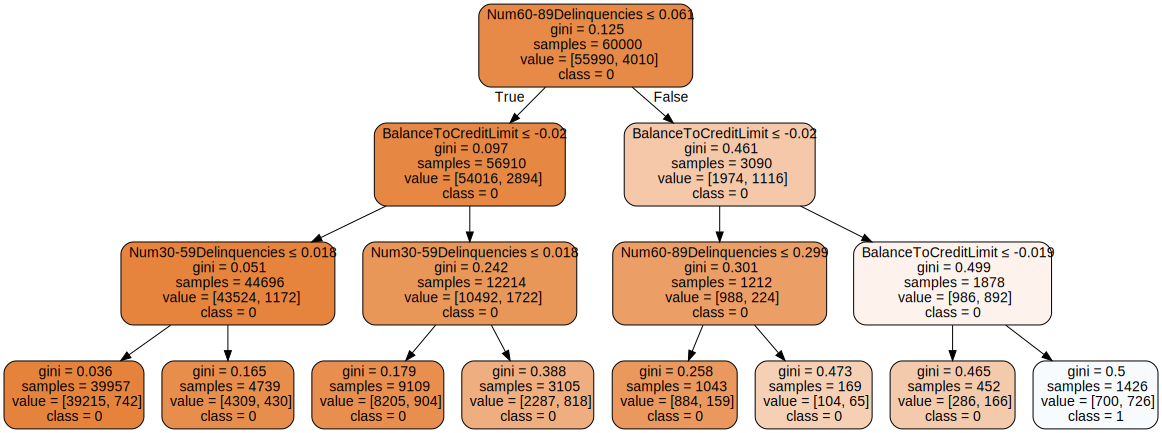

In [504]:
dot_data = export_graphviz(clf,
                  feature_names=X_train.columns,
                  class_names='01',
                  filled=True, rounded=True,
                  special_characters=True,
                   out_file=None)

graph = graphviz.Source(dot_data)
graph

---
Визуализируем дерево без масштабирования для лучшей интерпретируемости

---

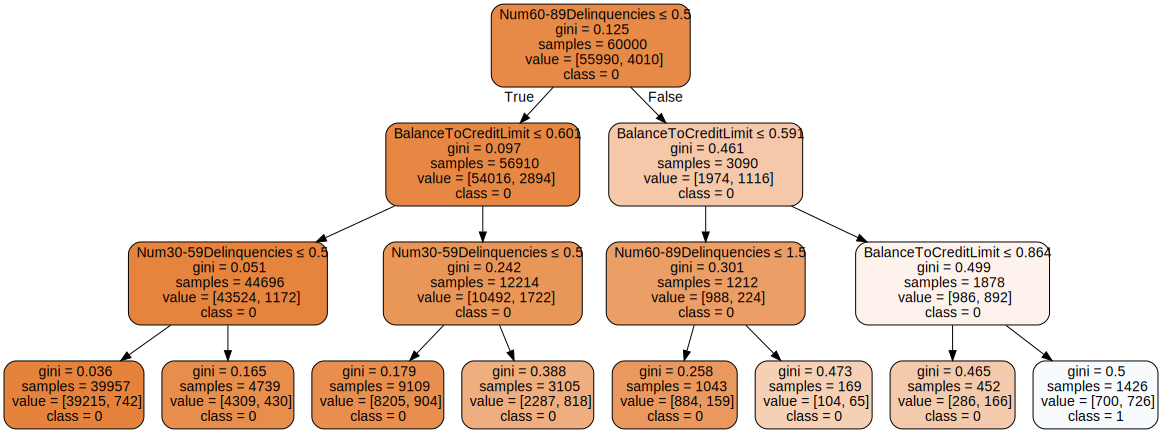

In [505]:
dot_data = export_graphviz(clf_no_scaler,
                  feature_names=X_train.columns,
                  class_names='01',
                  filled=True, rounded=True,
                  special_characters=True,
                   out_file=None)

graph = graphviz.Source(dot_data)
graph

1.3 Рассмотрите, как изменение глубины дерева влияет на качество модели. Обучите решающее дерево с различной глубиной (от 1 до 11), оцените его точность и определите, когда начинается переобучение и какая глубина дерева является оптимальной





In [506]:
from sklearn.metrics import accuracy_score

In [507]:
# Функция для обучения с различной глубиной
def TrainForest(X_train_scaled, X_test_scaled, y_test, y_train):
    accuracy = []  # Инициализируем список для точностей
    for i in range(1, 12):
        clf = DecisionTreeClassifier(max_depth=i)
        clf.fit(X_train_scaled, y_train)
        predicted = clf.predict(X_test_scaled)
        acc = accuracy_score(y_test, predicted)
        print(f"{acc}, Глубина: {i}")
        accuracy.append(acc)
    return max(accuracy), accuracy.index(max(accuracy)) + 1

In [508]:
# Вызов функции
max_accuracy = TrainForest(X_train_scaled, X_test_scaled, y_test, y_train)
print("Максимальная точность:", max_accuracy)

0.9331333333333334, Глубина: 1
0.9331333333333334, Глубина: 2
0.9326, Глубина: 3
0.9340666666666667, Глубина: 4
0.9327333333333333, Глубина: 5
0.9332, Глубина: 6
0.9329333333333333, Глубина: 7
0.9319333333333333, Глубина: 8
0.9302666666666667, Глубина: 9
0.9307333333333333, Глубина: 10
0.9278666666666666, Глубина: 11
Максимальная точность: (0.9340666666666667, 4)


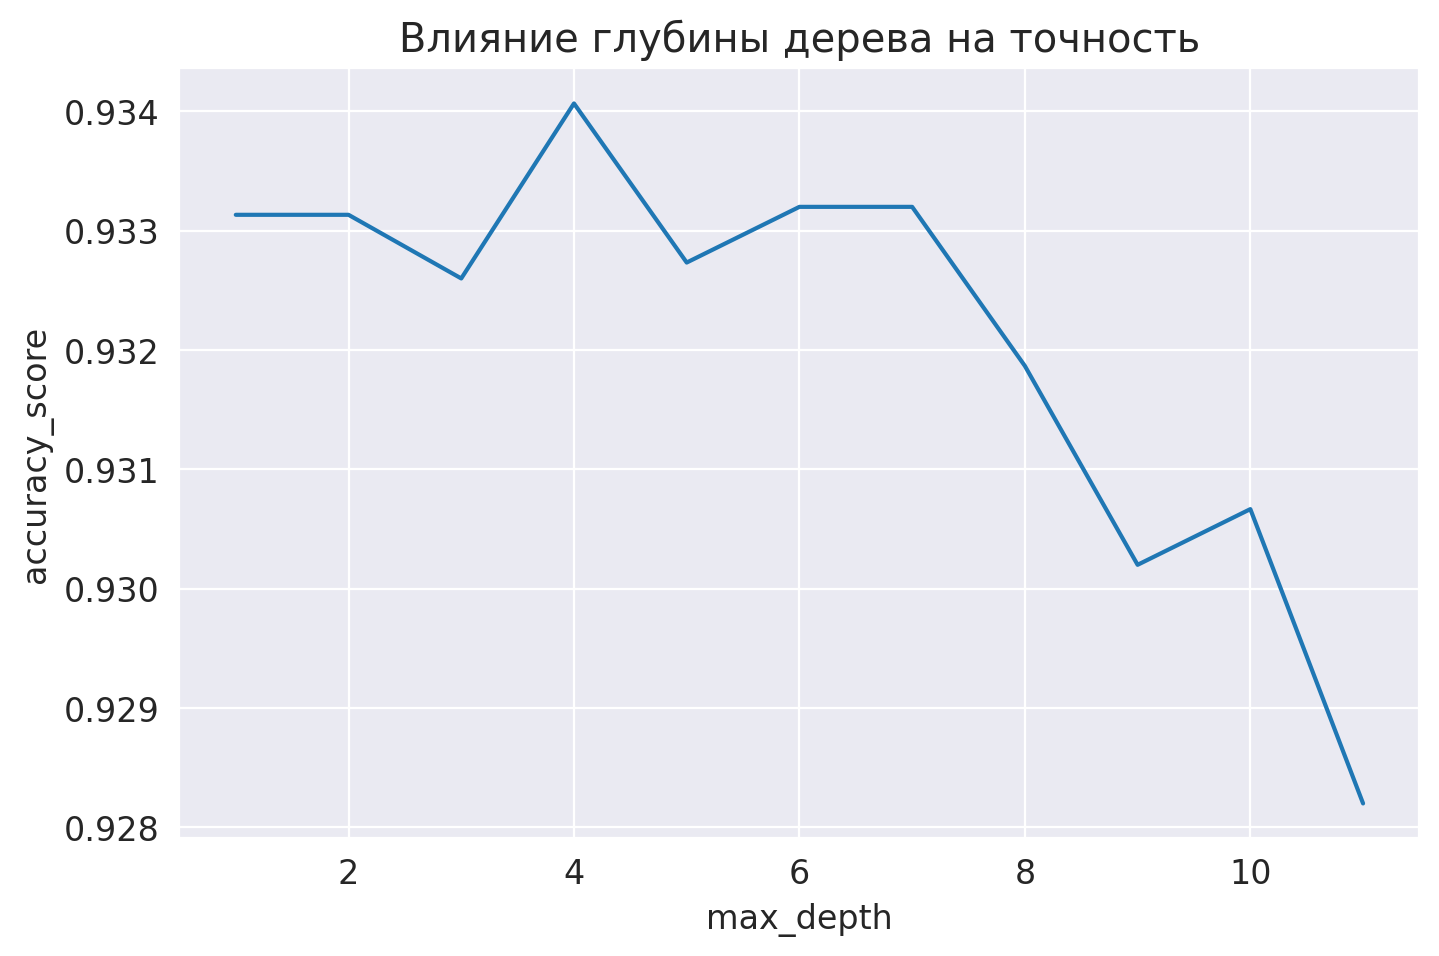

In [509]:
# Выполним визуализацию
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
scores = []
depths = list(range(1, 12))
for i in depths:
  clf = DecisionTreeClassifier(max_depth = i)
  clf.fit(X_train_scaled, y_train)
  predicted = clf.predict(X_test_scaled)
  scores.append(
      accuracy_score(y_test, predicted)
  )
plt.plot(depths, scores)
plt.title("Влияние глубины дерева на точность")
plt.ylabel('accuracy_score')
plt.xlabel('max_depth')
plt.show()

---
Согласно полученным значениям метрики можно сделать вывод, что точность растёт для для значения глубины дерева в пределах [1, 4], после чего начинает снижаться, что свидетельствует о переобучении.

---
Таким образом, оптимальная глубина дерева = 4.

1.4 Настройте параметры дерева с помощью GridSearhCV, посмотрите на лучшую комбинацию параметров и среднее качество на 5-кратной кросс-валидации.

In [510]:
from sklearn.model_selection import GridSearchCV

In [511]:
# Определение сетки параметров
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

In [512]:
# Создание объекта GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

In [513]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=11),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='accuracy')

In [514]:
# Вывод лучших параметров и среднего качества на кросс-валидации
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее среднее качество:", grid_search.best_score_)

Лучшие параметры: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшее среднее качество: 0.9336666666666668


GridSearch с cv = 5 показал лучшую комбинацию параметров, с помощью которой можно достигнуть большей точности. Дерево с такими параметрами будет принято за лучшее.

1.5 Визуализируйте лучшее решающее дерево


In [515]:
# Инициализация и обучение
best_clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 1, min_samples_split = 2)

In [516]:
best_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4)

<function matplotlib.pyplot.show(close=None, block=None)>

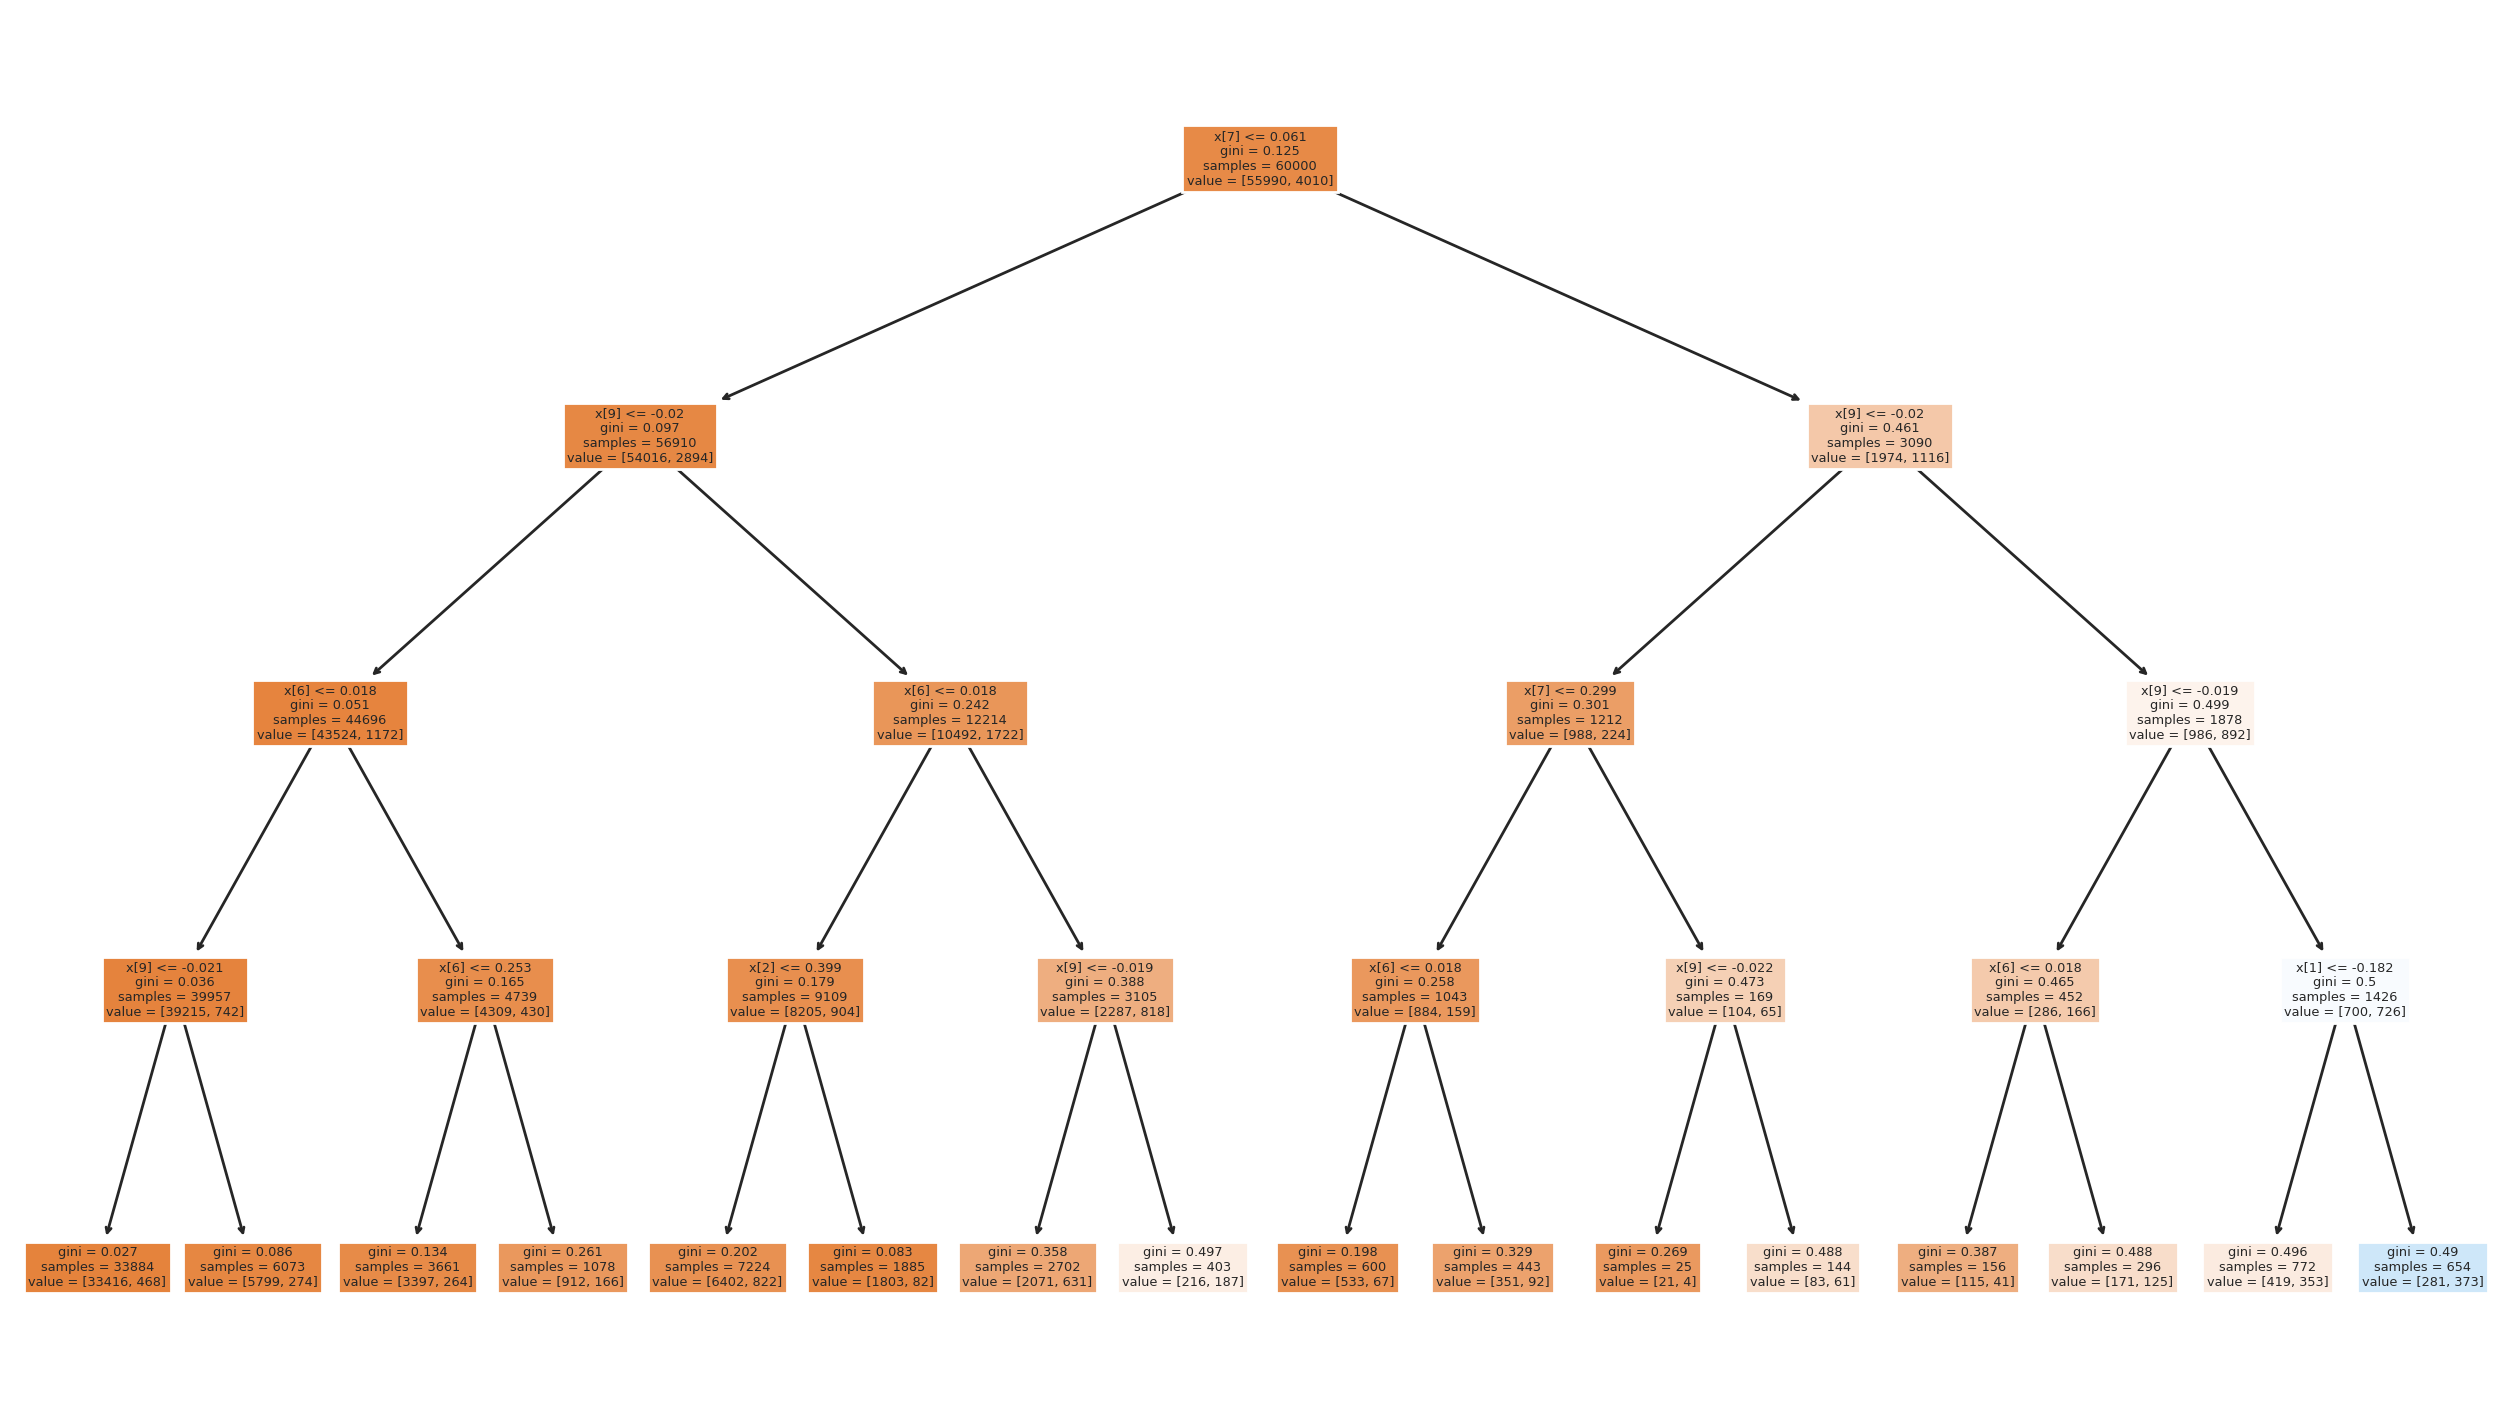

In [517]:
plt.figure(figsize = (16, 9))
plot_tree(best_clf, filled = True)
plt.show

1.6 Обучите Случайный лес (RandomForestClassifier), Настройте гиперпараметры случайного леса с помощью GridSearhCV, посмотрите на лучшую комбинацию параметров и среднее качество на 5-кратной кросс-валидации. Не забывайте про распараллеливание (n_jobs=-1).



In [443]:
from sklearn.ensemble import RandomForestClassifier

Я пробовал сделать с бОльшим количеством параметров и с бОльшими значениями, но процесс занял 90 минут и так не дошёл до конца.

In [444]:
# Определение сетки параметров для поиска
param_grid = {
    'n_estimators': [5, 10, 15], # количество деревьев в лесу
    'max_depth': [3, 6, 11],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
}

# Создание модели случайного леса
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее среднее качество:", grid_search.best_score_)

Лучшие параметры: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Лучшее среднее качество: 0.9348000000000001


1.7 Посмотрите, как настроенный случайный лес оценивает важность признаков по их влиянию на целевой признак. Представьте результаты в наглядном виде с помощью DataFrame.



In [445]:
# Получение лучшей модели
best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print("Точность на тестовом наборе:", accuracy)

Точность на тестовом наборе: 0.9354


In [446]:
# Получение важности признаков
feature_importances = best_rf.feature_importances_
# Создание DataFrame
feature_names = X_train.columns
features_df = pd.DataFrame({'Feature': np.array(feature_names), 'Importance': feature_importances})
# Сортировка
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df)

                 Feature  Importance
9   BalanceToCreditLimit    0.326860
6  Num30-59Delinquencies    0.292329
7  Num60-89Delinquencies    0.229692
2                    Age    0.048610
1                    DIR    0.031682
3               NumLoans    0.028351
4     NumRealEstateLoans    0.014540
8                 Income    0.012525
0              client_id    0.010800
5          NumDependents    0.004611


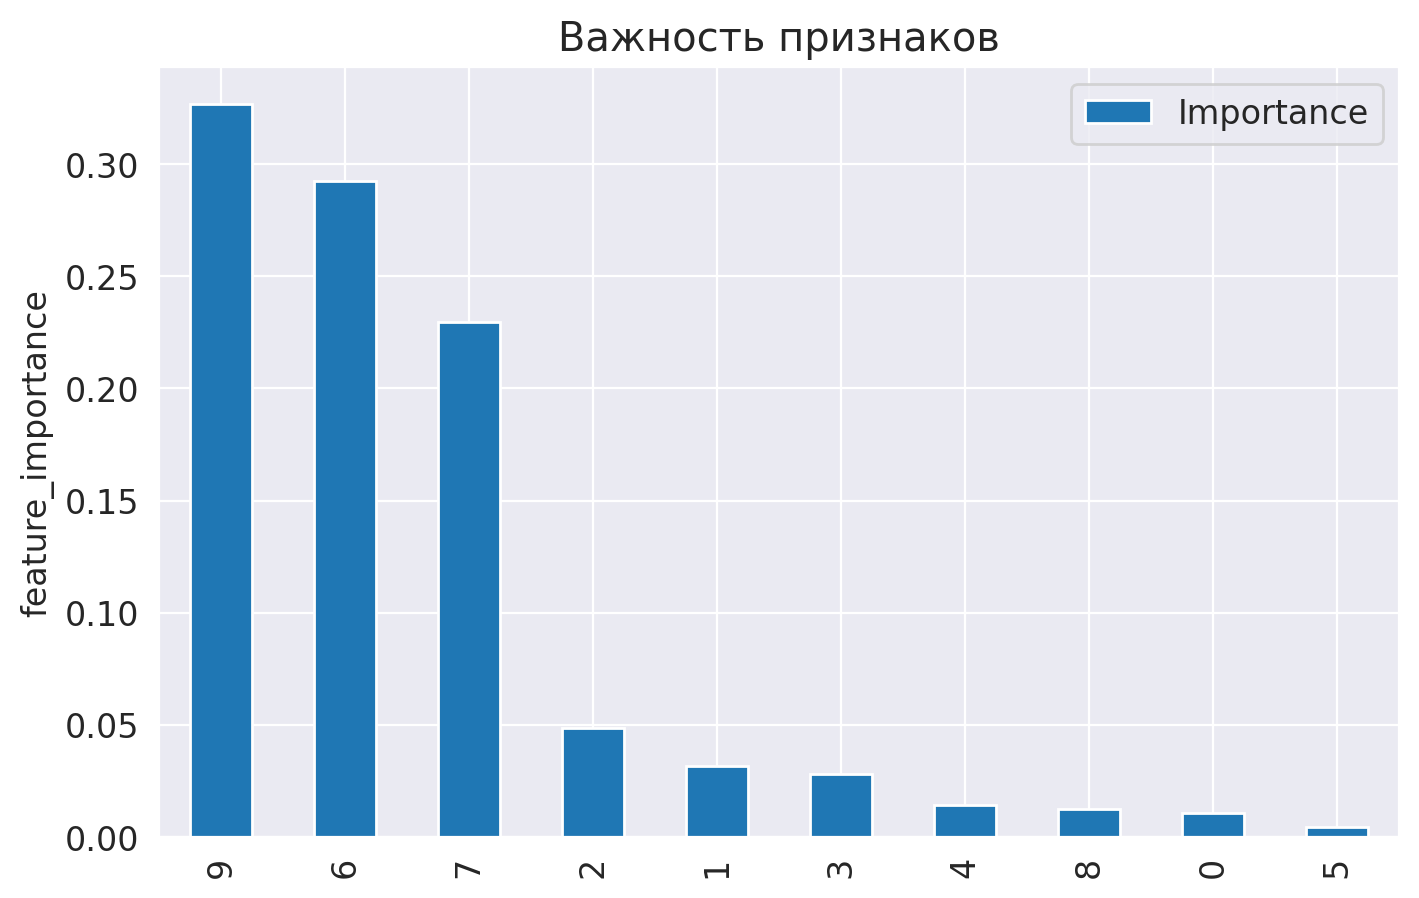

In [447]:
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
features_df.plot(kind='bar')
plt.ylabel('feature_importance')
plt.title('Важность признаков')
plt.show()

1.9 Выберите метрику и объясните ваш выбор метрики и сравните результаты решающего дерева и случайного леса

---



Оценим сбалансированность классов:

In [448]:
print(y_train.value_counts())

0    55981
1     4019
Name: Delinquent90, dtype: int64


Для несбалансированных классов лучше использовать метрику, которая может дать более полное представление о производительности модели на разных классах. F1-мера является хорошим выбором, так как она учитывает как точность (precision), так и полноту (recall), предоставляя баланс между ними.

In [449]:
from sklearn.metrics import f1_score

# Предсказания для решающего дерева и случайного леса
predictions_tree = best_clf.predict(X_test_scaled)
predictions_forest = best_rf.predict(X_test_scaled)

# Расчёт F1-меры для обеих моделей
f1_tree = f1_score(y_test, predictions_tree, average='weighted')  # Используем взвешенную версию для учёта баланса классов
f1_forest = f1_score(y_test, predictions_forest, average='weighted')

print(f"F1-мера решающего дерева: {f1_tree}")
print(f"F1-мера случайного леса: {f1_forest}")

F1-мера решающего дерева: 0.9127858635403964
F1-мера случайного леса: 0.9095267762574397


# 2 Бустинг xgboost

In [450]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, plot_importance


In [451]:
!wget  -O 'telecom_churn.csv' -q 'https://www.dropbox.com/scl/fi/t8ickc6qfwdtfx6v40crd/telecom_churn.csv?rlkey=i7slagusqlb9pvsqdzvwac0x1&dl=0'

In [452]:
df_telecom = pd.read_csv("telecom_churn.csv")
df_telecom

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


2.1 XGBoost поддерживает только числовые признаки. Поэтому текстовые признаки требуют предобработки

Штаты можно просто занумеровать, а признаки International plan (наличие международного роуминга), Voice mail plan (наличие голосовой почтыы) и целевой Churn сделать бинарными.




In [453]:
le = LabelEncoder()
df_telecom['State'], df_telecom['International plan'], df_telecom['Voice mail plan'], df_telecom['Churn'] = le.fit_transform(df_telecom['State']), le.fit_transform(df_telecom['International plan']), le.fit_transform(df_telecom['Voice mail plan']), le.fit_transform(df_telecom['Churn'])
df_telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


2.2 Разделим данные на обучающую и тестовую выборки в отношении 7:3.

In [454]:
X_train, X_test, y_train, y_test = train_test_split(df_telecom.drop('Churn', axis = 'columns'), df_telecom['Churn'], random_state = 42, test_size = 0.3)

2.3 Инициализируете параметры и обучите классификатор xgboost

In [455]:
from xgboost import XGBClassifier

In [456]:
bst = XGBClassifier()

In [457]:
bst.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

2.4 Получите прогнозы для тестовой выборки и посчитайте долю правильных ответов алгоритма на тестовой выборке.

In [458]:
prediction = bst.predict(X_test)
print(f'Доля правильных ответов на тестовой выборке: {accuracy_score(y_test, prediction)}')

Доля правильных ответов на тестовой выборке: 0.949


2.5 Важность признаков
Вычислите F score (не F мера!) для оценки важности признаков в Xgboost.

In [459]:
# Получение важности признаков
feature_importances = bst.get_booster().get_score(importance_type='weight')

# Преобразование важности признаков в DataFrame для наглядности
importances_df = pd.DataFrame(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True),
                              columns=['Feature', 'F-score'])

# Вывод важности признаков
print(importances_df)

                   Feature  F-score
0        Total day minutes    272.0
1        Total eve minutes    256.0
2      Total night minutes    183.0
3       Total intl minutes    158.0
4        Total night calls    134.0
5          Total day calls    133.0
6          Total eve calls    126.0
7           Account length    113.0
8                    State     96.0
9   Customer service calls     96.0
10        Total intl calls     76.0
11      International plan     52.0
12         Voice mail plan     31.0
13               Area code     18.0
14   Number vmail messages     18.0
15      Total night charge     18.0
16        Total eve charge      6.0


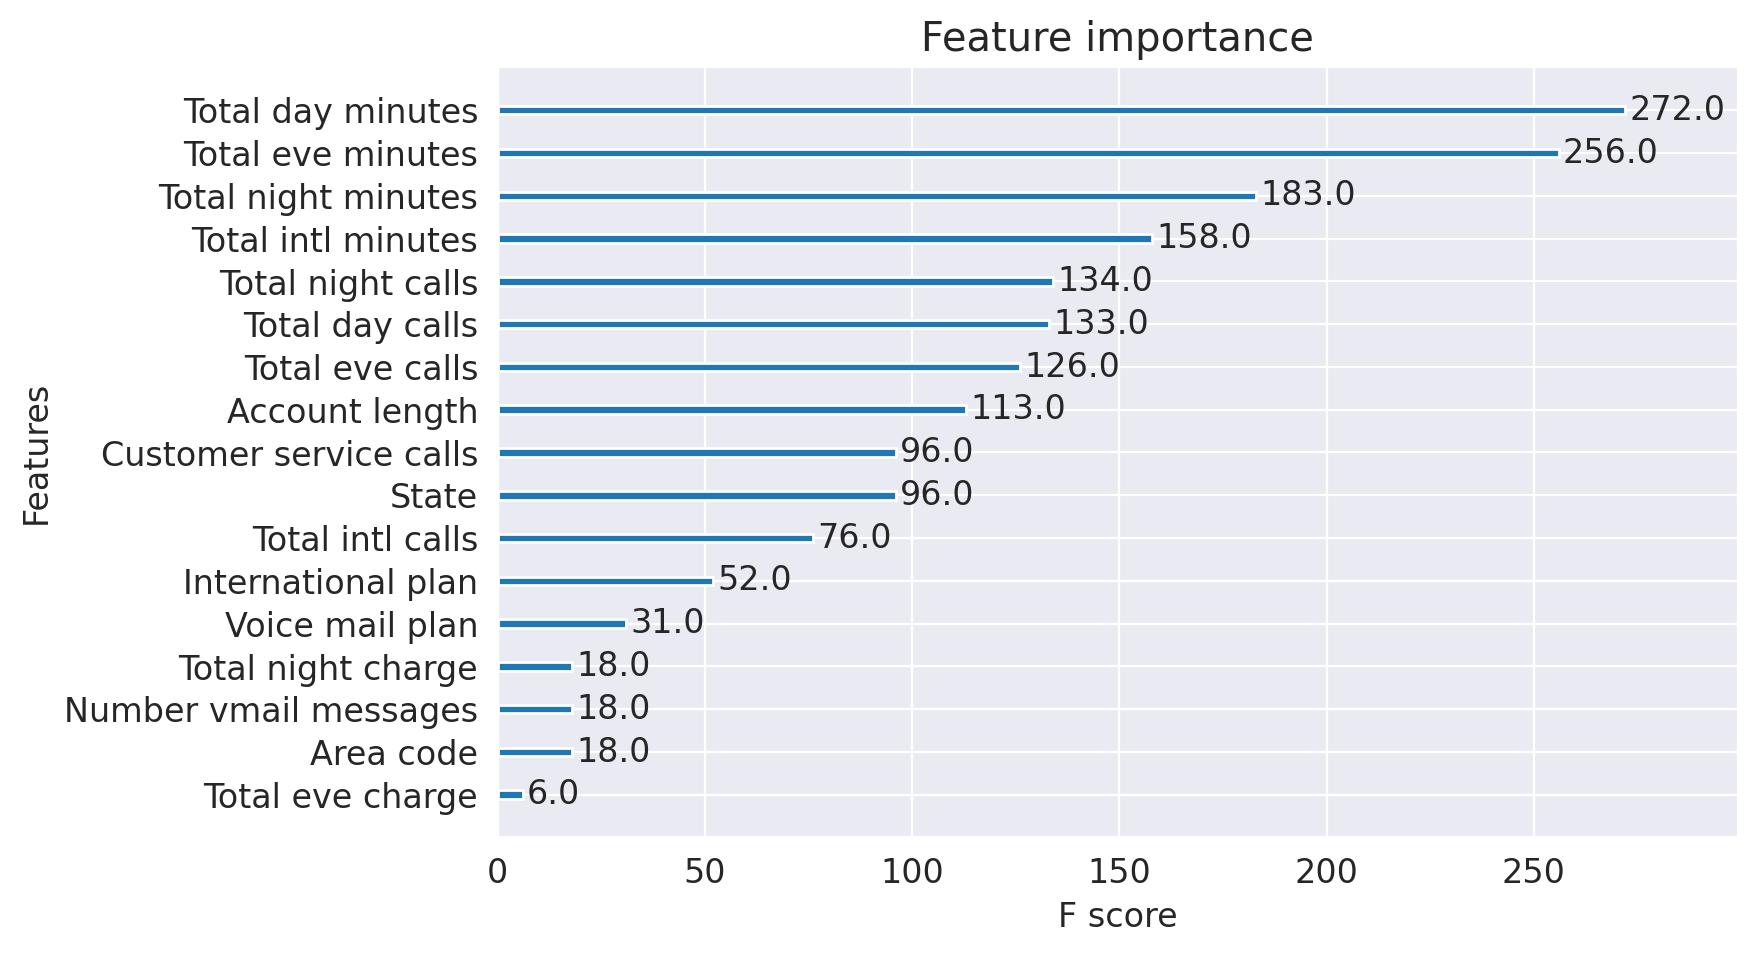

In [460]:
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plot_importance(bst)
plt.show()